#Classification using Random forest

In this note book you are going to use the random forest method to classify the fruit quality. The data set is the same as what you used in the midsem exam. But you will be using data that is clean and requires no preprocessing

##Import libraries

In [ ]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

## Load Data

In [ ]:
data = pd.read_excel('./fruit_quality_feature_selection.xlsx')

In [ ]:
data.head()

,Unnamed: 0,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,-11.164234,-2.579535,...,12.493873,-7.470583,1.063577,0.777777,4.483415,-4.761654,6.865028,9.930660,-12.436600,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,-5.614572,-3.233375,...,-10.194498,4.854840,6.952697,-2.056149,-4.341631,0.777687,4.324958,-4.951600,-0.650797,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,-3.808185,-0.257426,...,-8.783988,3.273937,-0.567199,-2.650977,7.149754,-4.073256,-2.443988,-1.028510,0.662273,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,-4.538529,-2.098115,...,0.536751,-4.539743,6.194293,-7.601921,2.673557,-2.885712,-7.059607,-0.205281,-3.785011,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,-0.495704,-0.148086,...,5.517743,4.254349,-3.068834,-1.735111,8.791312,2.006573,-2.737364,5.494103,-1.826369,good


## Extract features and targets into two numpy arrays

In [ ]:
X = data[data.columns[1:-1]].to_numpy()
y = data.Quality.to_numpy()
feature_names = data.columns[1:-1]

# Train-Test Split
train_size=0.8, random_state=42

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

## Feature Selection

### Drop low variance features

In [ ]:
columns_to_drop_low_var = []

### Drop features that do not add any information using ANOVA

In [ ]:
indices_to_drop_high_correlation = []

### Drop highly correlated features

In [ ]:
indices_to_drop_high_correlation = []

## Select important features only

In [ ]:
columns_to_drop = list(set(columns_to_drop_low_var + indices_to_drop_ftest + indices_to_drop_high_correlation))

columns_to_drop.sort(reverse=True)

for i in columns_to_drop:
  X_train = np.delete(X_train, i, 1)
  X_test = np.delete(X_test, i, 1)
  feature_names = np.delete(feature_names, i)

In [ ]:
X_train.shape, X_test.shape

((3200, 5), (800, 5))

## Random Forest Classifier

1. Create an instance of Random Forest Classifier (RFC) with default parameters
2. Train RFC
3. Get predictions for test and train
4. Get metrics: accuracy, f1, precision, recall for train and test data
5. Plot a bar chart of feature importance vs. feature name. The concept will be explained once you reach this point
6. (Optional): Perform k-fold cross validation to obtain the best model



Steps 1 to 4:

In [ ]:
# use: random_state=123456789
clf = RandomForestClassifier(random_state=123456789)

In [ ]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=123456789)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [ ]:
yhat_test = clf.predict(X_test)

In [ ]:
np.unique(yhat_test)

array(['bad', 'good'], dtype=object)

In [ ]:
accuracy_score(y_test, yhat_test)

0.8225

Step 5:

In [ ]:
import matplotlib.pyplot as plt

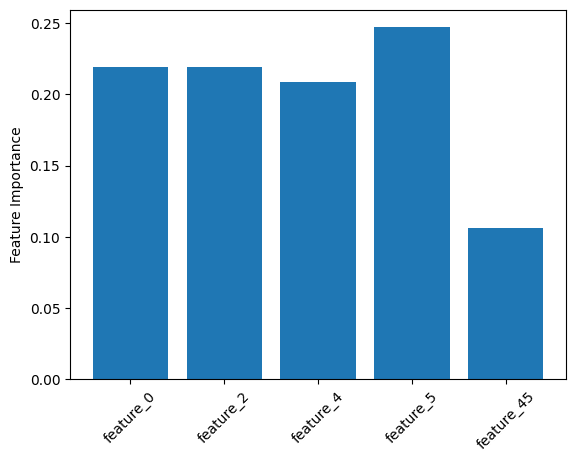

In [ ]:
fig, ax = plt.subplots()

ax.bar(feature_names, clf.feature_importances_)
ax.tick_params(axis='x', labelrotation=45)
ax.set_ylabel('Feature Importance')
fig.show()